Enter the commodity:  Rice
Enter the state:  Gujarat
Enter the district:  Surat


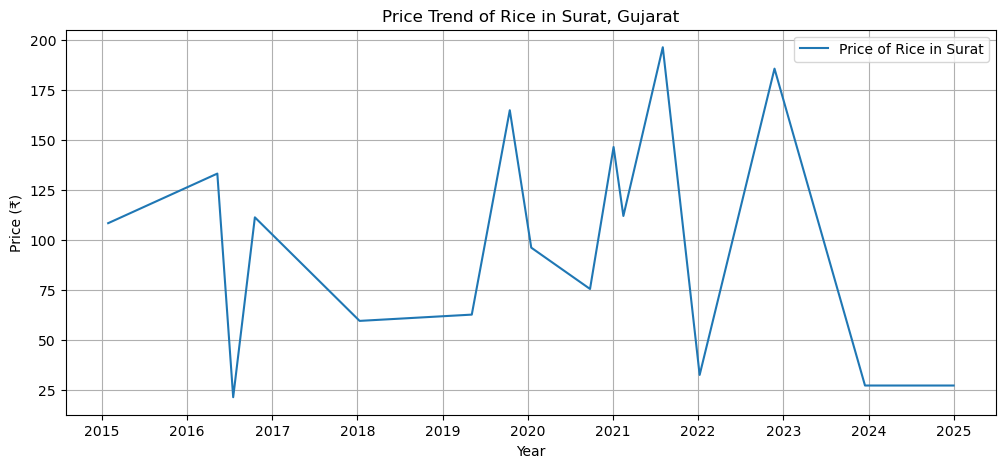

Random Forest Prediction - MAE: 2.55, RMSE: 4.17


Enter a future date (YYYY-MM-DD) for price prediction:  2025-01-31


Forecasted price for 2025-01-31 is ₹20.48


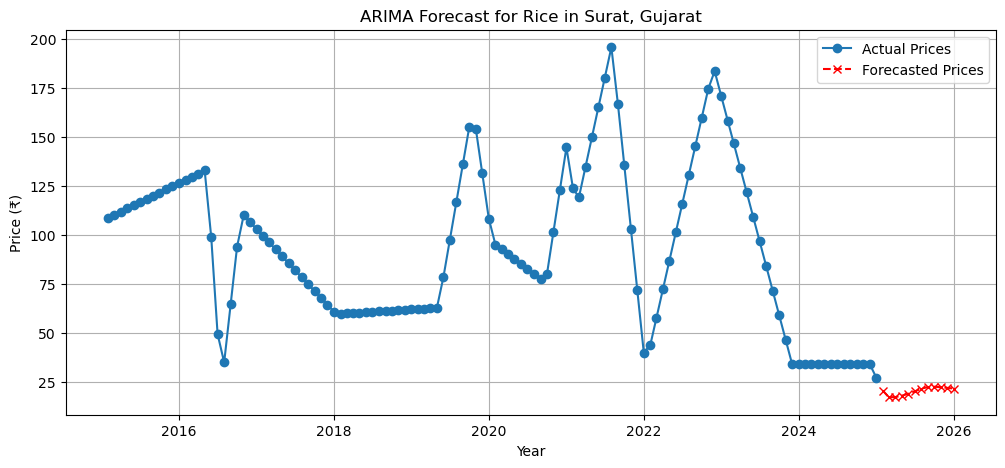

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------------- Step 1: Load Dataset ----------------
file_path = "commodity_prices_updated1.csv"  # Updated file name
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')  # Sort by date

# Feature Engineering: Extract Year, Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# ---------------- Step 2: User Input for Commodity, State, and District ----------------
commodity = input("Enter the commodity: ")
state = input("Enter the state: ")
district = input("Enter the district: ")

df_filtered = df[(df["Commodity"] == commodity) & (df["State"] == state) & (df["District"] == district)].copy()

if df_filtered.empty:
    print("No data found for the given commodity, state, and district. Please check your inputs.")
    exit()

# Convert categorical column 'Season' to numerical codes
df_filtered['Season_Code'] = df_filtered['Season'].astype('category').cat.codes  

# ---------------- Step 3: Data Visualization ----------------
plt.figure(figsize=(12, 5))
plt.plot(df_filtered["Date"], df_filtered["Price"], label=f"Price of {commodity} in {district}")
plt.xlabel("Year")
plt.ylabel("Price (₹)")
plt.title(f"Price Trend of {commodity} in {district}, {state}")
plt.legend()
plt.grid()
plt.show()

# ---------------- Step 4: Machine Learning Model for Price Prediction ----------------
X = df_filtered[['Year', 'Month', 'Season_Code']]
y = df_filtered['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Random Forest Prediction - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# ---------------- Step 5: Time Series Forecasting using ARIMA ----------------
# Ensure there are enough observations
if len(df_filtered) < 30:
    print("Not enough data for ARIMA modeling. Skipping forecast.")
else:
    df_filtered.set_index('Date', inplace=True)  
    df_filtered = df_filtered[['Price']].asfreq('ME')  # Monthly-end frequency
    df_filtered = df_filtered.ffill()  # Forward fill missing values

    # Fit ARIMA model
    arima_model = ARIMA(df_filtered, order=(5, 1, 0))
    arima_fit = arima_model.fit()

    # Forecast next 12 months
    forecast_steps = 12
    forecast_dates = pd.date_range(df_filtered.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')
    forecast_values = arima_fit.forecast(steps=forecast_steps)

    # Store forecast in DataFrame
    forecast_df = pd.DataFrame({"Forecasted Price": forecast_values}, index=forecast_dates)

    # ---------------- Step 6: Function to Get Forecast for a Specific Date ----------------
    def get_forecast_price(date_str):
        date = pd.to_datetime(date_str)
        if date in forecast_df.index:
            return f"Forecasted price for {date.date()} is ₹{forecast_df.loc[date, 'Forecasted Price']:.2f}"
        else:
            return "Date is out of forecast range. Please choose a date within the next 12 months."

    # User input for future date prediction
    user_input_date = input("Enter a future date (YYYY-MM-DD) for price prediction: ")
    print(get_forecast_price(user_input_date))

    # ---------------- Step 7: Plot Forecasted Prices ----------------
    plt.figure(figsize=(12, 5))
    plt.plot(df_filtered.index, df_filtered['Price'], label="Actual Prices", marker='o')
    plt.plot(forecast_df.index, forecast_df["Forecasted Price"], label="Forecasted Prices", linestyle="dashed", color="red", marker='x')
    plt.xlabel("Year")
    plt.ylabel("Price (₹)")
    plt.title(f"ARIMA Forecast for {commodity} in {district}, {state}")
    plt.legend()
    plt.grid()
    plt.show()


In [2]:
df.describe()


,Date,Price,Month,Year
count,794256,794256.000000,794256.000000,794256.000000
mean,2020-01-13 06:55:28.917627392,103.904446,6.523304,2019.533979
min,2015-01-02 00:00:00,10.000000,1.000000,2015.000000
25%,2017-10-08 00:00:00,69.352266,4.000000,2017.000000
50%,2020-01-16 00:00:00,104.467335,7.000000,2020.000000
75%,2022-04-22 00:00:00,137.850162,9.000000,2022.000000
max,2024-12-31 00:00:00,200.000000,12.000000,2024.000000
std,NaN,44.185825,3.422039,2.672428


Latest available date in the dataset: 2024-12-31


Enter the commodity:  Onion
Enter the state:  West Bengal
Enter the district:  Kolkata


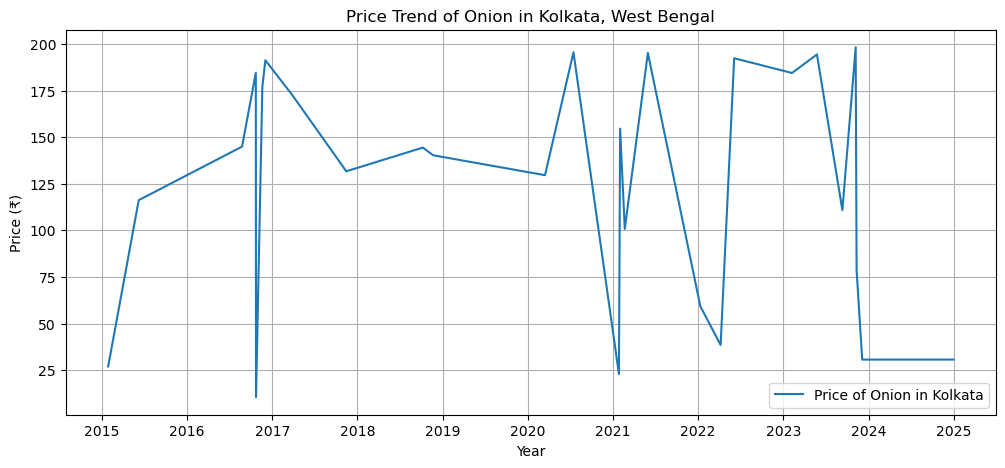

Random Forest Prediction - MAE: 3.33, RMSE: 8.14
You can enter a future date between 2025-01-31 and 2025-12-31 for prediction.


Enter a future date (YYYY-MM-DD) for price prediction:  2025-01-28


Date is out of forecast range. Please enter a date between 2025-01-31 and 2025-12-31.


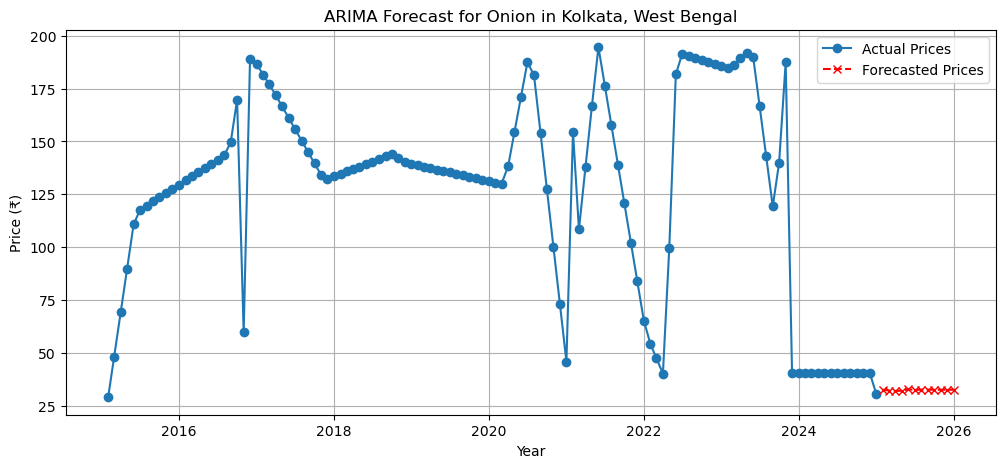

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------------- Step 1: Load Dataset ----------------
file_path = "commodity_prices_updated1.csv"  # Updated file name
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')  # Sort by date

# Feature Engineering: Extract Year, Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Get the latest available date in the dataset
max_available_date = df['Date'].max()
print(f"Latest available date in the dataset: {max_available_date.date()}")

# ---------------- Step 2: User Input for Commodity, State, and District ----------------
commodity = input("Enter the commodity: ")
state = input("Enter the state: ")
district = input("Enter the district: ")

df_filtered = df[(df["Commodity"] == commodity) & (df["State"] == state) & (df["District"] == district)].copy()

if df_filtered.empty:
    print("No data found for the given commodity, state, and district. Please check your inputs.")
    exit()

# Convert categorical column 'Season' to numerical codes
df_filtered['Season_Code'] = df_filtered['Season'].astype('category').cat.codes  

# ---------------- Step 3: Data Visualization ----------------
plt.figure(figsize=(12, 5))
plt.plot(df_filtered["Date"], df_filtered["Price"], label=f"Price of {commodity} in {district}")
plt.xlabel("Year")
plt.ylabel("Price (₹)")
plt.title(f"Price Trend of {commodity} in {district}, {state}")
plt.legend()
plt.grid()
plt.show()

# ---------------- Step 4: Machine Learning Model for Price Prediction ----------------
X = df_filtered[['Year', 'Month', 'Season_Code']]
y = df_filtered['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Random Forest Prediction - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# ---------------- Step 5: Time Series Forecasting using ARIMA ----------------
# Ensure there are enough observations
if len(df_filtered) < 30:
    print("Not enough data for ARIMA modeling. Skipping forecast.")
else:
    df_filtered.set_index('Date', inplace=True)  
    df_filtered = df_filtered[['Price']].asfreq('ME')  # Monthly-end frequency
    df_filtered = df_filtered.ffill()  # Forward fill missing values

    # Fit ARIMA model
    arima_model = ARIMA(df_filtered, order=(5, 1, 0))
    arima_fit = arima_model.fit()

    # Forecast next 12 months
    forecast_steps = 12
    forecast_dates = pd.date_range(df_filtered.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')
    forecast_values = arima_fit.forecast(steps=forecast_steps)

    # Store forecast in DataFrame
    forecast_df = pd.DataFrame({"Forecasted Price": forecast_values}, index=forecast_dates)

    # Maximum date user can enter
    max_forecast_date = forecast_dates[-1]
    print(f"You can enter a future date between {forecast_dates[0].date()} and {max_forecast_date.date()} for prediction.")

    # ---------------- Step 6: Function to Get Forecast for a Specific Date ----------------
    def get_forecast_price(date_str):
        date = pd.to_datetime(date_str)
        if date in forecast_df.index:
            return f"Forecasted price for {date.date()} is ₹{forecast_df.loc[date, 'Forecasted Price']:.2f}"
        else:
            return f"Date is out of forecast range. Please enter a date between {forecast_dates[0].date()} and {max_forecast_date.date()}."

    # User input for future date prediction
    user_input_date = input("Enter a future date (YYYY-MM-DD) for price prediction: ")
    print(get_forecast_price(user_input_date))

    # ---------------- Step 7: Plot Forecasted Prices ----------------
    plt.figure(figsize=(12, 5))
    plt.plot(df_filtered.index, df_filtered['Price'], label="Actual Prices", marker='o')
    plt.plot(forecast_df.index, forecast_df["Forecasted Price"], label="Forecasted Prices", linestyle="dashed", color="red", marker='x')
    plt.xlabel("Year")
    plt.ylabel("Price (₹)")
    plt.title(f"ARIMA Forecast for {commodity} in {district}, {state}")
    plt.legend()
    plt.grid()
    plt.show()


Latest available date in the dataset: 2024-12-31


Enter the commodity:  Rice
Enter the state:  Gujarat
Enter the district:  Surat


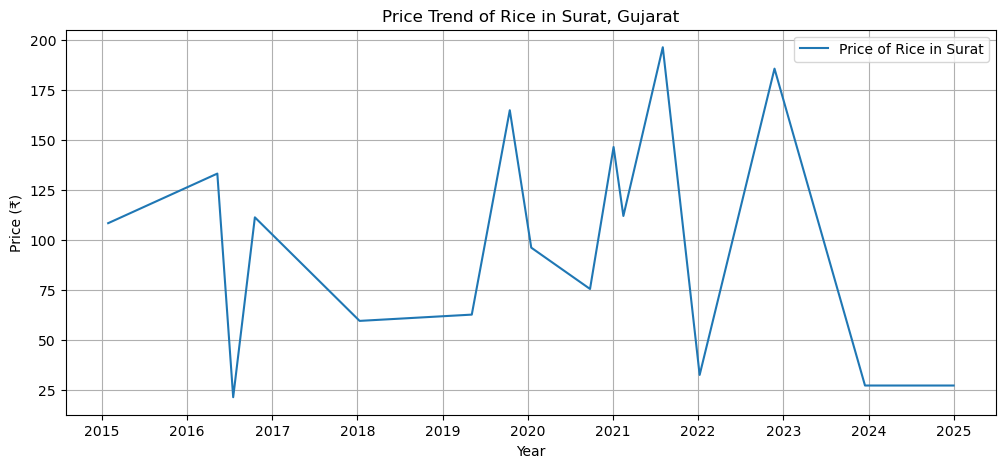

Random Forest Prediction - MAE: 2.55, RMSE: 4.17, Accuracy: 97.05%
You can enter a future date between 2025-01-31 and 2025-12-31 for prediction.
ARIMA Model - MAE: 6.01, RMSE: 13.17, Accuracy: 93.02%


Enter a future date (YYYY-MM-DD) for price prediction:  2025-01-31


Forecasted price for 2025-01-31 is ₹20.48


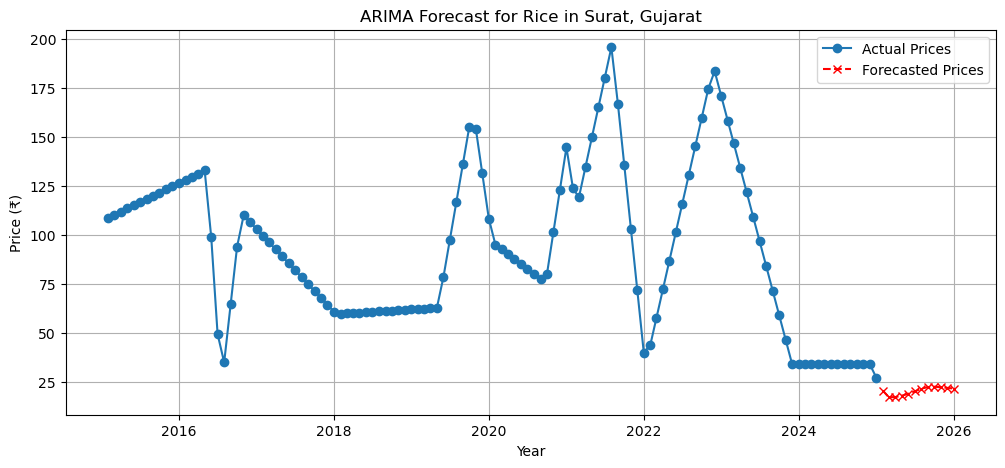

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------------- Step 1: Load Dataset ----------------
file_path = "commodity_prices_updated1.csv"  # Updated file name
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')  # Sort by date

# Feature Engineering: Extract Year, Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Get the latest available date in the dataset
max_available_date = df['Date'].max()
print(f"Latest available date in the dataset: {max_available_date.date()}")

# ---------------- Step 2: User Input for Commodity, State, and District ----------------
commodity = input("Enter the commodity: ")
state = input("Enter the state: ")
district = input("Enter the district: ")

df_filtered = df[(df["Commodity"] == commodity) & (df["State"] == state) & (df["District"] == district)].copy()

if df_filtered.empty:
    print("No data found for the given commodity, state, and district. Please check your inputs.")
    exit()

# Convert categorical column 'Season' to numerical codes
df_filtered['Season_Code'] = df_filtered['Season'].astype('category').cat.codes  

# ---------------- Step 3: Data Visualization ----------------
plt.figure(figsize=(12, 5))
plt.plot(df_filtered["Date"], df_filtered["Price"], label=f"Price of {commodity} in {district}")
plt.xlabel("Year")
plt.ylabel("Price (₹)")
plt.title(f"Price Trend of {commodity} in {district}, {state}")
plt.legend()
plt.grid()
plt.show()

# ---------------- Step 4: Machine Learning Model for Price Prediction ----------------
X = df_filtered[['Year', 'Month', 'Season_Code']]
y = df_filtered['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Accuracy calculation

print(f"Random Forest Prediction - MAE: {mae:.2f}, RMSE: {rmse:.2f}, Accuracy: {100 - mape:.2f}%")

# ---------------- Step 5: Time Series Forecasting using ARIMA ----------------
# Ensure there are enough observations
if len(df_filtered) < 30:
    print("Not enough data for ARIMA modeling. Skipping forecast.")
else:
    df_filtered.set_index('Date', inplace=True)  
    df_filtered = df_filtered[['Price']].asfreq('ME')  # Monthly-end frequency
    df_filtered = df_filtered.ffill()  # Forward fill missing values

    # Fit ARIMA model
    arima_model = ARIMA(df_filtered, order=(5, 1, 0))
    arima_fit = arima_model.fit()

    # Forecast next 12 months
    forecast_steps = 12
    forecast_dates = pd.date_range(df_filtered.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')
    forecast_values = arima_fit.forecast(steps=forecast_steps)

    # Store forecast in DataFrame
    forecast_df = pd.DataFrame({"Forecasted Price": forecast_values}, index=forecast_dates)

    # Maximum date user can enter
    max_forecast_date = forecast_dates[-1]
    print(f"You can enter a future date between {forecast_dates[0].date()} and {max_forecast_date.date()} for prediction.")

    # Calculate ARIMA accuracy using in-sample prediction
    y_arima_pred = arima_fit.predict(start=0, end=len(df_filtered) - 1)
    y_actual = df_filtered["Price"]

    arima_mae = mean_absolute_error(y_actual, y_arima_pred)
    arima_rmse = np.sqrt(mean_squared_error(y_actual, y_arima_pred))
    arima_mape = np.mean(np.abs((y_actual - y_arima_pred) / y_actual)) * 100  # Accuracy calculation

    print(f"ARIMA Model - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}, Accuracy: {100 - arima_mape:.2f}%")

    # ---------------- Step 6: Function to Get Forecast for a Specific Date ----------------
    def get_forecast_price(date_str):
        date = pd.to_datetime(date_str)
        if date in forecast_df.index:
            return f"Forecasted price for {date.date()} is ₹{forecast_df.loc[date, 'Forecasted Price']:.2f}"
        else:
            return f"Date is out of forecast range. Please enter a date between {forecast_dates[0].date()} and {max_forecast_date.date()}."

    # User input for future date prediction
    user_input_date = input("Enter a future date (YYYY-MM-DD) for price prediction: ")
    print(get_forecast_price(user_input_date))

    # ---------------- Step 7: Plot Forecasted Prices ----------------
    plt.figure(figsize=(12, 5))
    plt.plot(df_filtered.index, df_filtered['Price'], label="Actual Prices", marker='o')
    plt.plot(forecast_df.index, forecast_df["Forecasted Price"], label="Forecasted Prices", linestyle="dashed", color="red", marker='x')
    plt.xlabel("Year")
    plt.ylabel("Price (₹)")
    plt.title(f"ARIMA Forecast for {commodity} in {district}, {state}")
    plt.legend()
    plt.grid()
    plt.show()


In [4]:
import pandas as pd
import numpy as np
import joblib
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load Dataset
file_path = "commodity_prices_updated1.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# User Input
commodity = input("Enter the commodity: ")
state = input("Enter the state: ")
district = input("Enter the district: ")

df_filtered = df[(df["Commodity"] == commodity) & (df["State"] == state) & (df["District"] == district)].copy()

if df_filtered.empty:
    print("No data found!")
    exit()

df_filtered['Season_Code'] = df_filtered['Season'].astype('category').cat.codes  

# Train RandomForest Model
X = df_filtered[['Year', 'Month', 'Season_Code']]
y = df_filtered['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save RandomForest Model
joblib.dump(rf_model, "rf_model.pkl")

# Train ARIMA Model if sufficient data
if len(df_filtered) >= 30:
    df_filtered.set_index('Date', inplace=True)
    df_filtered = df_filtered[['Price']].asfreq('ME').ffill()
    
    arima_model = ARIMA(df_filtered, order=(5, 1, 0))
    arima_fit = arima_model.fit()

    # Save ARIMA Model
    joblib.dump(arima_fit, "arima_model.pkl")

    # Save DataFrame structure for later use
    df_filtered.to_csv("filtered_data.csv")

print("Models saved successfully!")


Enter the commodity:  Potato
Enter the state:  Maharashtra
Enter the district:  Mumbai


Models saved successfully!


In [5]:
import pandas as pd
import joblib
import numpy as np
from datetime import datetime

# Load full dataset
file_path = "commodity_prices_updated1.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Get user input for commodity, state, district
commodity = input("Enter the commodity: ")
state = input("Enter the state: ")
district = input("Enter the district: ")

# Apply filtering
df_filtered = df[(df["Commodity"] == commodity) & (df["State"] == state) & (df["District"] == district)].copy()

if df_filtered.empty:
    print("No data found for the given inputs!")
    exit()

df_filtered['Season_Code'] = df_filtered['Season'].astype('category').cat.codes  

# Load the RandomForest model
rf_model = joblib.load("rf_model.pkl")

# Get user input for prediction date
date_str = input("Enter a future date (YYYY-MM-DD) for price prediction: ")

# Convert date input to extract year & month
try:
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    year = date_obj.year
    month = date_obj.month
except ValueError:
    print("Invalid date format! Please enter in YYYY-MM-DD format.")
    exit()

# Get most common season code
season_code = df_filtered['Season_Code'].mode()[0]

# Prepare input data
input_data = np.array([[year, month, season_code]])

# Predict price
predicted_price = rf_model.predict(input_data)[0]
print(f"Predicted Price on {date_str}: ₹{predicted_price:.2f}")

# ------------------- ARIMA Forecasting -------------------
try:
    arima_model = joblib.load("arima_model.pkl")

    # Forecast for next 12 months
    df_filtered.set_index('Date', inplace=True)
    df_filtered = df_filtered[['Price']].asfreq('ME').ffill()

    forecast_steps = 12
    forecast_dates = pd.date_range(df_filtered.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')
    forecast_values = arima_model.forecast(steps=forecast_steps)

    # Store in DataFrame
    forecast_df = pd.DataFrame({"Forecasted Price": forecast_values}, index=forecast_dates)

    # Check if the input date is within forecast range
    if date_obj in forecast_df.index:
        print(f"ARIMA Forecasted Price on {date_str}: ₹{forecast_df.loc[date_obj, 'Forecasted Price']:.2f}")
    else:
        print(f"Date is out of ARIMA forecast range! Available range: {forecast_dates[0].date()} to {forecast_dates[-1].date()}")

except FileNotFoundError:
    print("ARIMA model not found! Skipping forecast.")


Enter the commodity:  Tomato
Enter the state:  Maharashtra
Enter the district:  Pune
Enter a future date (YYYY-MM-DD) for price prediction:  2025-01-31


Predicted Price on 2025-01-31: ₹133.00
ARIMA Forecasted Price on 2025-01-31: ₹46.02


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load full dataset
file_path = "commodity_prices_updated1.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# User Input
commodity = input("Enter the commodity: ")
state = input("Enter the state: ")
district = input("Enter the district: ")

# Filtering Data
df_filtered = df[(df["Commodity"] == commodity) & (df["State"] == state) & (df["District"] == district)].copy()

if df_filtered.empty:
    print("No data found for the given inputs!")
    exit()

df_filtered['Season_Code'] = df_filtered['Season'].astype('category').cat.codes  

# Load RandomForest Model
rf_model = joblib.load("rf_model.pkl")

# User input for prediction date
date_str = input("Enter a future date (YYYY-MM-DD) for price prediction: ")

# Convert date input
try:
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    year = date_obj.year
    month = date_obj.month
except ValueError:
    print("Invalid date format! Please enter in YYYY-MM-DD format.")
    exit()

# Get most common season code
season_code = df_filtered['Season_Code'].mode()[0]

# Prepare input data
input_data = np.array([[year, month, season_code]])

# Predict price using RandomForest
predicted_price = rf_model.predict(input_data)[0]
print(f"Predicted Price on {date_str}: ₹{predicted_price:.2f}")

# Model Evaluation
X = df_filtered[['Year', 'Month', 'Season_Code']]
y = df_filtered['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Accuracy calculation

print(f"Random Forest - MAE: {mae:.2f}, RMSE: {rmse:.2f}, Accuracy: {100 - mape:.2f}%")

# ------------------- ARIMA Forecasting -------------------
try:
    arima_model = joblib.load("arima_model.pkl")

    # Forecast for next 12 months
    df_filtered.set_index('Date', inplace=True)
    df_filtered = df_filtered[['Price']].asfreq('ME').ffill()

    forecast_steps = 12
    forecast_dates = pd.date_range(df_filtered.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')
    forecast_values = arima_model.forecast(steps=forecast_steps)

    # Store forecast in DataFrame
    forecast_df = pd.DataFrame({"Forecasted Price": forecast_values}, index=forecast_dates)

    # ARIMA Model Evaluation
    y_arima_pred = arima_model.predict(start=0, end=len(df_filtered) - 1)
    y_actual = df_filtered["Price"]

    arima_mae = mean_absolute_error(y_actual, y_arima_pred)
    arima_rmse = np.sqrt(mean_squared_error(y_actual, y_arima_pred))
    arima_mape = np.mean(np.abs((y_actual - y_arima_pred) / y_actual)) * 100  # Accuracy calculation

    print(f"ARIMA Model - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}, Accuracy: {100 - arima_mape:.2f}%")

    # Check if the input date is within forecast range
    if date_obj in forecast_df.index:
        arima_predicted_price = forecast_df.loc[date_obj, 'Forecasted Price']
        print(f"ARIMA Forecasted Price on {date_str}: ₹{arima_predicted_price:.2f}")
    else:
        print(f"Date is out of ARIMA forecast range! Available range: {forecast_dates[0].date()} to {forecast_dates[-1].date()}")

    # ------------------- Plot Graphs -------------------
    plt.figure(figsize=(12, 5))
    plt.plot(df_filtered.index, df_filtered['Price'], label="Actual Prices", marker='o', color='blue')
    plt.plot(forecast_df.index, forecast_df["Forecasted Price"], label="Forecasted Prices (ARIMA)", linestyle="dashed", color="red", marker='x')
    plt.axvline(date_obj, color='green', linestyle="--", label=f"Prediction Date ({date_str})")
    plt.xlabel("Year")
    plt.ylabel("Price (₹)")
    plt.title(f"Price Forecast for {commodity} in {district}, {state}")
    plt.legend()
    plt.grid()
    plt.show()

except FileNotFoundError:
    print("ARIMA model not found! Skipping forecast.")


Enter the commodity:  Onion
Enter the state:  Gujarat
Enter the district:  Surat
Enter a future date (YYYY-MM-DD) for price prediction:  2025-01-31


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Price on 2025-01-31: ₹120.43


NameError: name 'train_test_split' is not defined

Latest available date in dataset: 2024-12-31


Enter the commodity:  rice
Enter the state:  maharashtra
Enter the district:  pune


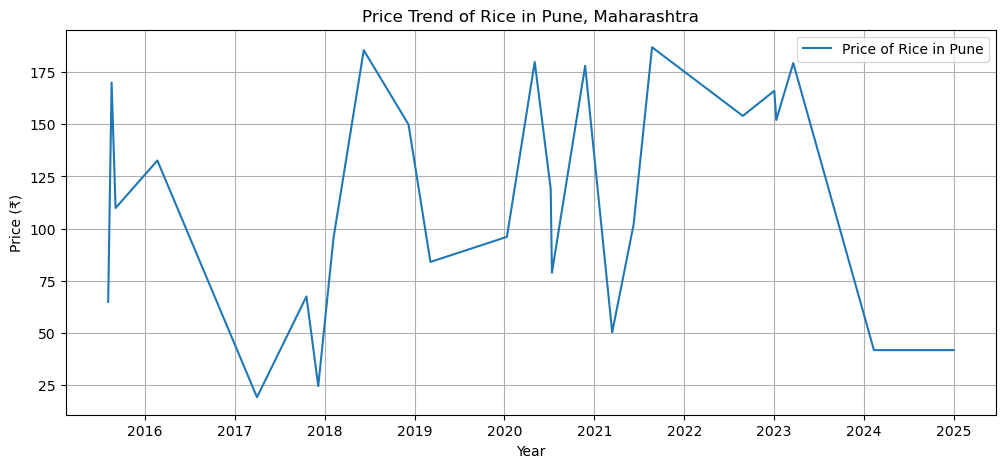

Random Forest Prediction - MAE: 3.11, RMSE: 5.56, Accuracy: 96.54%
You can enter a future date between 2025-01-31 and 2025-12-31 for prediction.
ARIMA Model - MAE: 7.51, RMSE: 15.21, Accuracy: 91.62%


Enter a future date (YYYY-MM-DD) for price prediction:  2025-01-31


Forecasted price for 2025-01-31 is ₹38.02


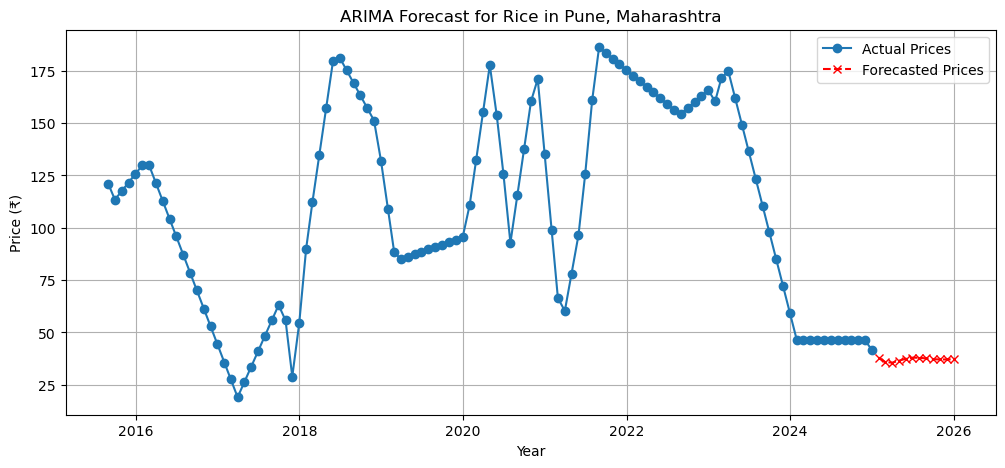

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------------- Step 1: Load Dataset ----------------
file_path = "commodity_prices_updated1.csv"

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check the file path.")
    exit()

# Convert Date column to datetime format
if "Date" not in df.columns:
    print("Error: 'Date' column not found in dataset.")
    exit()

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)  # Remove invalid dates
df = df.sort_values(by='Date')

# Feature Engineering: Extract Year, Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Latest available date in dataset
max_available_date = df['Date'].max()
print(f"Latest available date in dataset: {max_available_date.date()}")

# ---------------- Step 2: User Input Handling ----------------
commodity = input("Enter the commodity: ").strip().lower().title()
state = input("Enter the state: ").strip().lower().title()
district = input("Enter the district: ").strip().lower().title()

df_filtered = df[
    (df["Commodity"].str.lower() == commodity.lower()) &
    (df["State"].str.lower() == state.lower()) &
    (df["District"].str.lower() == district.lower())
].copy()

if df_filtered.empty:
    print("Error: No data found for the given commodity, state, and district. Please check your inputs.")
    exit()

# Convert categorical column 'Season' to numerical codes
if "Season" in df_filtered.columns:
    df_filtered['Season_Code'] = df_filtered['Season'].astype('category').cat.codes
else:
    print("Error: 'Season' column missing from dataset.")
    exit()

# ---------------- Step 3: Data Visualization ----------------
plt.figure(figsize=(12, 5))
plt.plot(df_filtered["Date"], df_filtered["Price"], label=f"Price of {commodity} in {district}")
plt.xlabel("Year")
plt.ylabel("Price (₹)")
plt.title(f"Price Trend of {commodity} in {district}, {state}")
plt.legend()
plt.grid()
plt.show()

# ---------------- Step 4: Machine Learning Model ----------------
X = df_filtered[['Year', 'Month', 'Season_Code']]
y = df_filtered['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Accuracy calculation

print(f"Random Forest Prediction - MAE: {mae:.2f}, RMSE: {rmse:.2f}, Accuracy: {100 - mape:.2f}%")

# ---------------- Step 5: ARIMA Forecasting ----------------
if len(df_filtered) < 30:
    print("Not enough data for ARIMA modeling. Skipping forecast.")
else:
    df_filtered.set_index('Date', inplace=True)
    df_filtered = df_filtered[['Price']].asfreq('ME').ffill()  # Monthly-end frequency

    # Fit ARIMA model
    try:
        arima_model = ARIMA(df_filtered, order=(5, 1, 0))
        arima_fit = arima_model.fit()
    except Exception as e:
        print(f"ARIMA model training failed: {e}")
        exit()

    # Forecast next 12 months
    forecast_steps = 12
    forecast_dates = pd.date_range(df_filtered.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')
    forecast_values = arima_fit.forecast(steps=forecast_steps)

    forecast_df = pd.DataFrame({"Forecasted Price": forecast_values}, index=forecast_dates)

    max_forecast_date = forecast_dates[-1]
    print(f"You can enter a future date between {forecast_dates[0].date()} and {max_forecast_date.date()} for prediction.")

    # ARIMA Model Evaluation
    y_arima_pred = arima_fit.predict(start=0, end=len(df_filtered) - 1)
    y_actual = df_filtered["Price"]

    arima_mae = mean_absolute_error(y_actual, y_arima_pred)
    arima_rmse = np.sqrt(mean_squared_error(y_actual, y_arima_pred))
    arima_mape = np.mean(np.abs((y_actual - y_arima_pred) / y_actual)) * 100

    print(f"ARIMA Model - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}, Accuracy: {100 - arima_mape:.2f}%")

    # ---------------- Step 6: Forecast for a Specific Date ----------------
    def get_forecast_price(date_str):
        try:
            date = pd.to_datetime(date_str)
            if date in forecast_df.index:
                return f"Forecasted price for {date.date()} is ₹{forecast_df.loc[date, 'Forecasted Price']:.2f}"
            else:
                return f"Date is out of forecast range. Enter a date between {forecast_dates[0].date()} and {max_forecast_date.date()}."
        except ValueError:
            return "Invalid date format. Please enter a valid date in YYYY-MM-DD format."

    user_input_date = input("Enter a future date (YYYY-MM-DD) for price prediction: ")
    print(get_forecast_price(user_input_date))

    # ---------------- Step 7: Plot Forecasted Prices ----------------
    plt.figure(figsize=(12, 5))
    plt.plot(df_filtered.index, df_filtered['Price'], label="Actual Prices", marker='o')
    plt.plot(forecast_df.index, forecast_df["Forecasted Price"], label="Forecasted Prices", linestyle="dashed", color="red", marker='x')
    plt.xlabel("Year")
    plt.ylabel("Price (₹)")
    plt.title(f"ARIMA Forecast for {commodity} in {district}, {state}")
    plt.legend()
    plt.grid()
    plt.show()


Latest available date in dataset: 2024-12-31


Enter the commodity:  edible oil
Enter the state:  uttar pradesh
Enter the district:  varanasi


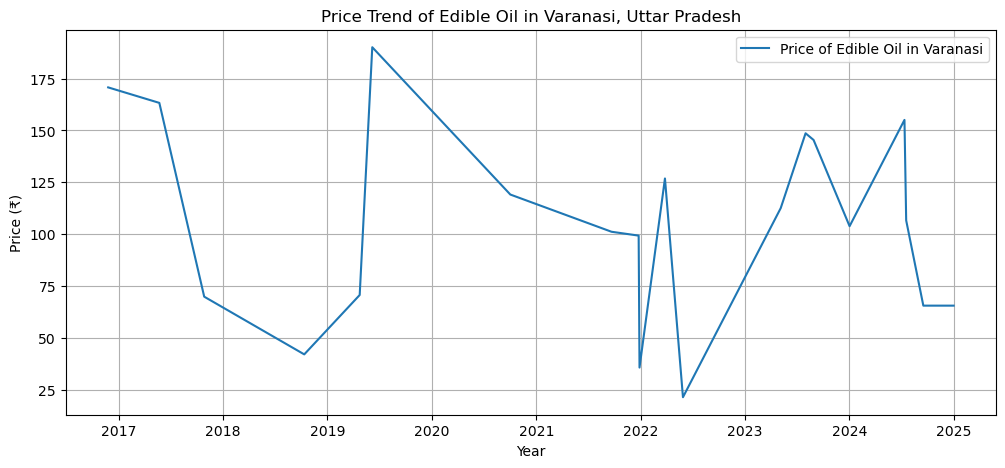

ARIMA Model - MAE: 9.79, RMSE: 22.92, Accuracy: 88.20%
You can enter a future date between 2025-01-31 and 2025-12-31 for prediction.


Enter a future date (YYYY-MM-DD) for price prediction:  2025-06-26


Forecasted price for 2025-06-30 is ₹60.06


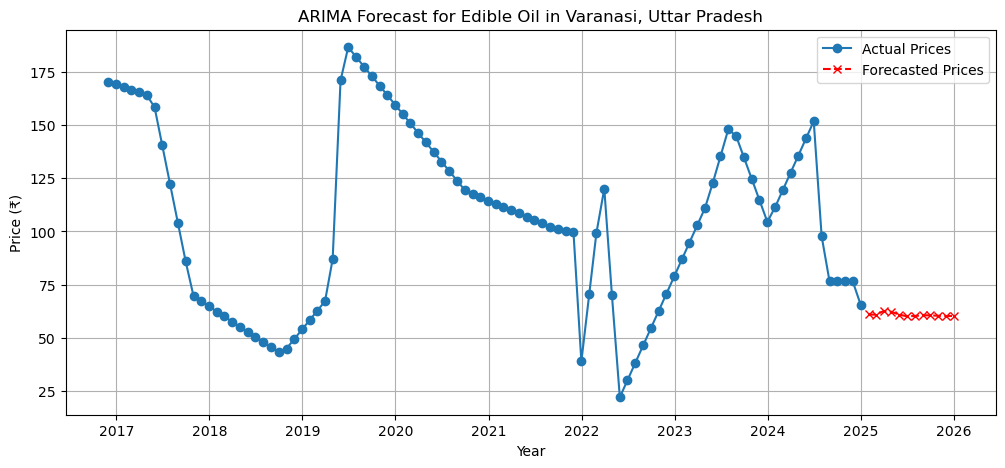

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------------- Step 1: Load Dataset ----------------
file_path = "commodity_prices_updated1.csv"

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check the file path.")
    exit()

# Convert Date column to datetime format
if "Date" not in df.columns:
    print("Error: 'Date' column not found in dataset.")
    exit()

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)  # Remove invalid dates
df = df.sort_values(by='Date')

# Feature Engineering: Extract Year, Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Latest available date in dataset
max_available_date = df['Date'].max()
print(f"Latest available date in dataset: {max_available_date.date()}")

# ---------------- Step 2: User Input Handling ----------------
commodity = input("Enter the commodity: ").strip().title()
state = input("Enter the state: ").strip().title()
district = input("Enter the district: ").strip().title()

df_filtered = df[
    (df["Commodity"].str.title() == commodity) &
    (df["State"].str.title() == state) &
    (df["District"].str.title() == district)
].copy()

if df_filtered.empty:
    print("Error: No data found for the given commodity, state, and district. Please check your inputs.")
    exit()

# Convert categorical column 'Season' to numerical codes
if "Season" in df_filtered.columns:
    df_filtered['Season_Code'] = df_filtered['Season'].astype('category').cat.codes
else:
    print("Error: 'Season' column missing from dataset.")
    exit()

# ---------------- Step 3: Data Visualization ----------------
plt.figure(figsize=(12, 5))
plt.plot(df_filtered["Date"], df_filtered["Price"], label=f"Price of {commodity} in {district}")
plt.xlabel("Year")
plt.ylabel("Price (₹)")
plt.title(f"Price Trend of {commodity} in {district}, {state}")
plt.legend()
plt.grid()
plt.show()

# ---------------- Step 4: Machine Learning Model ----------------
X = df_filtered[['Year', 'Month', 'Season_Code']]
y = df_filtered['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Accuracy calculation

# print(f"Random Forest Prediction - MAE: {mae:.2f}, RMSE: {rmse:.2f}, Accuracy: {100 - mape:.2f}%")

# ---------------- Step 5: ARIMA Forecasting ----------------
if len(df_filtered) < 30:
    print("Not enough data for ARIMA modeling. Skipping forecast.")
else:
    df_filtered.set_index('Date', inplace=True)
    df_filtered = df_filtered[['Price']].asfreq('ME').ffill()  # Monthly-end frequency

    # Fit ARIMA model
    try:
        arima_model = ARIMA(df_filtered, order=(5, 1, 0))
        arima_fit = arima_model.fit()
    except Exception as e:
        print(f"ARIMA model training failed: {e}")
        exit()

    # Forecast next 12 months
    forecast_steps = 12
    forecast_dates = pd.date_range(df_filtered.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')
    forecast_values = arima_fit.forecast(steps=forecast_steps)

    forecast_df = pd.DataFrame({"Forecasted Price": forecast_values}, index=forecast_dates)

    # ARIMA Model Evaluation
    y_arima_pred = arima_fit.predict(start=0, end=len(df_filtered) - 1)
    y_actual = df_filtered["Price"]

    arima_mae = mean_absolute_error(y_actual, y_arima_pred)
    arima_rmse = np.sqrt(mean_squared_error(y_actual, y_arima_pred))
    arima_mape = np.mean(np.abs((y_actual - y_arima_pred) / y_actual)) * 100

    print(f"ARIMA Model - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}, Accuracy: {100 - arima_mape:.2f}%")

    # Display forecast date range
    print(f"You can enter a future date between {forecast_dates[0].date()} and {forecast_dates[-1].date()} for prediction.")

    # ---------------- Step 6: Forecast for a Specific Date ----------------
    def get_forecast_price(date_str):
        try:
            date = pd.to_datetime(date_str)
            nearest_date = forecast_df.index[forecast_df.index.get_indexer([date], method="nearest")[0]]
            return f"Forecasted price for {nearest_date.date()} is ₹{forecast_df.loc[nearest_date, 'Forecasted Price']:.2f}"
        except (KeyError, ValueError):
            return "Invalid date. Please enter a valid date in YYYY-MM-DD format within the forecast range."

    user_input_date = input("Enter a future date (YYYY-MM-DD) for price prediction: ")
    print(get_forecast_price(user_input_date))

    # ---------------- Step 7: Plot Forecasted Prices ----------------
    plt.figure(figsize=(12, 5))
    plt.plot(df_filtered.index, df_filtered['Price'], label="Actual Prices", marker='o')
    plt.plot(forecast_df.index, forecast_df["Forecasted Price"], label="Forecasted Prices", linestyle="dashed", color="red", marker='x')
    plt.xlabel("Year")
    plt.ylabel("Price (₹)")
    plt.title(f"ARIMA Forecast for {commodity} in {district}, {state}")
    plt.legend()
    plt.grid()
    plt.show()

